In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# GOAL:  we are trying to find which features in the data have the highest impact on customer spend.

In [2]:
df = pd.read_csv("AN_EW_CUST_DATASET_202303141449.csv")

In [3]:
df.head()

,IID,AGE_,INCOME,ETHNIC_CODE_GROUP,AN_BIRTHDAY,POSTAL_CD,LOYALTY_YN,LOYALTY_ENROLLMENT_DT,FIRST_ANTHRO_ORDER,LIFETIME_APPAREL_DEMAND,...,STORE_NAME,STORE_ZIP,DIVISION_NAME,DEPARTMENT_NAME,CLASS_NAME,PRODUCT_ID,ITEM_NAME,MD_STATE,DEMAND_QTY,DEMAND_AMT
0,010TUGIXZ95K5R,57,8,K,0.0,85260.0,Y,00:00.0,3/24/2015,5059.97,...,"423 SCOTTSDALE,AZ-KIERLND (NA)",85254-2176,ANTHRO. WOMEN'S DIVISION (NA),ANTHRO. WOMEN'S BOTTOMS (NA),PANTS (NA),54766134,ASYMMETRICAL PULL ON PANT,REG PRICE,1,52.46
1,0109BPMLXNREXT,50,7,J,306.0,20017.0,Y,00:00.0,10/15/2015,17353.28,...,ANT DIRECT SELLING (NA),NaN,OFF HOURS (NA),ANTHRO - OFF HOURS (NA),LOUNGE (NA),59001933,COZY KNIT JOGGER,REG PRICE,1,44.96
2,0102I4L0PINZB3,54,11,E,1129.0,23233.0,Y,00:00.0,7/11/2017,4481.17,...,"444 RICHMOND, VA (NA)",23235-1955,ANTHRO. WOMEN'S DIVISION (NA),JACKETS (NA),OUTERWEAR - ANTHRO. (NA),69997476,UNREAL FUR KATHMANDU COAT,REG PRICE,1,179.97
3,010QS307CAT5WJ,48,11,K,204.0,23453.0,Y,00:00.0,6/28/2018,8312.67,...,ANT DIRECT SELLING (NA),NaN,APPAREL EXTENDED SIZES (NA),PETITES (NA),JEANS - PETITES (NA),58280181,OB HR FEMME DARTED SKINNY,MARKDOWN,1,128.00
4,0101EN5Q3W4AE8,32,9,K,0.0,94108.0,Y,00:00.0,7/12/2019,6528.04,...,ANT DIRECT SELLING (NA),NaN,APPAREL EXTENDED SIZES (NA),PETITES (NA),DRESSES - PETITES (NA),66952177,OB 1 SHLDR CHERRY PRNTD M,MARKDOWN,1,160.00


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284141 entries, 0 to 284140
Data columns (total 26 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   IID                       284141 non-null  object 
 1   AGE_                      284141 non-null  int64  
 2   INCOME                    284141 non-null  int64  
 3   ETHNIC_CODE_GROUP         284141 non-null  object 
 4   AN_BIRTHDAY               243602 non-null  float64
 5   POSTAL_CD                 284046 non-null  float64
 6   LOYALTY_YN                284141 non-null  object 
 7   LOYALTY_ENROLLMENT_DT     257998 non-null  object 
 8   FIRST_ANTHRO_ORDER        284141 non-null  object 
 9   LIFETIME_APPAREL_DEMAND   284141 non-null  float64
 10  LIFETIME_APPAREL_ORDERS   284141 non-null  int64  
 11  ORDER_DT                  284141 non-null  object 
 12  ORDER_ID                  284141 non-null  object 
 13  ORDER_LINE_SEQ            284141 non-null  i

In [5]:
mycolumn = df["ETHNIC_CODE_GROUP"].value_counts()
mycolumn

K    180366
E     35617
L     12572
A     12202
B     11398
Z      8861
C      7346
G      6634
J      6111
I      2062
D       733
F       198
M        37
H         4
Name: ETHNIC_CODE_GROUP, dtype: int64

<AxesSubplot: >

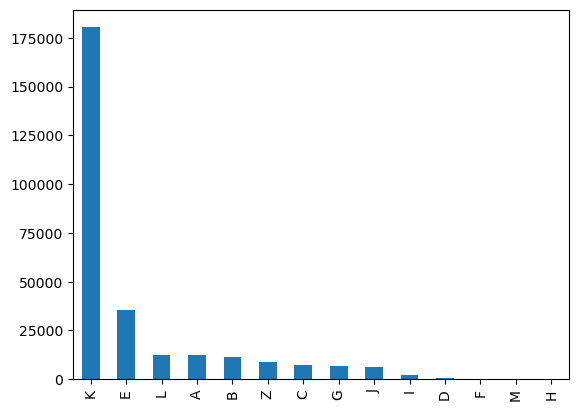

In [6]:
mycolumn.plot(kind="bar")

<AxesSubplot: ylabel='ETHNIC_CODE_GROUP'>

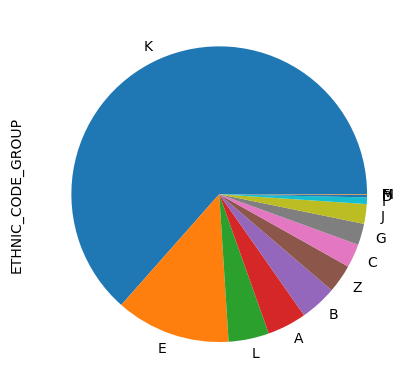

In [7]:
mycolumn.plot(kind="pie")

	VALUE	DESCRIPTION
	A	All African American
	B	Asian American 1
	C	Asian American 2
	D	Asian American 3
	E	Mediterranean
	F	Native American
	G	Scandinavian
	H	Polynesian
	I	Middle Eastern
	J	Jewish
	K	Western European
	L	Eastern European
	M	Miscellaneous - Other

In [10]:
# Filtering customers who visited more than once.

customer_frequency=df['IID'].value_counts()

customer_at_least_twice=customer_frequency[customer_frequency>1].index
customer_at_least_twice=list(customer_at_least_twice)
customer_at_least_twice

['010NNJ93E7VKUN',
 '0103IPXSGJD0X6',
 '010EAXG020328O',
 '010TPQOHLPTWWR',
 '0100TTZOKEZYCA',
 '010EF2O2JTXADL',
 '0108VVYR1GJ2F0',
 '010P0OLCI368WG',
 '010PXG5QVFDRTI',
 '010FWUXWDS10FC',
 '010P86L54YFI9B',
 '010C85LN8P8FNP',
 '010DO5W59TBX2I',
 '0113X2MODWB019',
 '010N7VG2IOXYEX',
 '010BJII4D0YBIX',
 '0115G7QWH7FY3N',
 '010AB0HK4R9RJA',
 '010AP6JC87A58U',
 '0100INEXMG9VLF',
 '010J9A8LGPOB87',
 '010SYAX2VA9SPQ',
 '010JP1HZS2KF16',
 '010MT2QDFMQJK1',
 '010H31WPJFS5GE',
 '010K4BIMGCTW7O',
 '0106SUXZQ8RMGM',
 '010OCEMWOKWCAV',
 '010YGG49KGXDGY',
 '010XOV3UC5J7N5',
 '010UUSEM265VTO',
 '010EEWJS9C15PO',
 '010C3G3CL8GC75',
 '0108TIAO0OQ91C',
 '01007WSI1HMG77',
 '010IH5HBN7JC78',
 '0109BPHS7VZOD5',
 '010CZ4TD813NJB',
 '010VQNZYNXVJMH',
 '0100Z50HZVRUEK',
 '010IFYT588IK1C',
 '0109XOG1J6IF53',
 '010CL32M9FOXMY',
 '0100GANDQZ0FCW',
 '010G1HO6T8CCZF',
 '010BKATQ0WE51U',
 '010TFBF6XSIRLL',
 '0115GW9C8RBQXP',
 '010JLDPL0NQZ4S',
 '010K2NSTO58YMC',
 '0100N3BPPV0AJG',
 '010YYN4M66CPPW',
 '01053ASY3E

In [15]:
customer_frequency[customer_frequency>1]

010NNJ93E7VKUN    8804
0103IPXSGJD0X6    1790
010EAXG020328O    1560
010TPQOHLPTWWR    1227
0100TTZOKEZYCA    1150
                  ... 
010XOE8XAOWP65       2
0100Y351VZCD0E       2
010N0P7SO8OR0K       2
010U9O9IUZI6GM       2
0112D0HNX4CJRJ       2
Name: IID, Length: 12589, dtype: int64

In [19]:
df.dtypes

IID                          object
AGE_                          int64
INCOME                        int64
ETHNIC_CODE_GROUP            object
AN_BIRTHDAY                 float64
POSTAL_CD                   float64
LOYALTY_YN                   object
LOYALTY_ENROLLMENT_DT        object
FIRST_ANTHRO_ORDER           object
LIFETIME_APPAREL_DEMAND     float64
LIFETIME_APPAREL_ORDERS       int64
ORDER_DT                     object
ORDER_ID                     object
ORDER_LINE_SEQ                int64
PURCHASE_CHANNEL_DERIVED     object
STORE_NUM                     int64
STORE_NAME                   object
STORE_ZIP                    object
DIVISION_NAME                object
DEPARTMENT_NAME              object
CLASS_NAME                   object
PRODUCT_ID                    int64
ITEM_NAME                    object
MD_STATE                     object
DEMAND_QTY                    int64
DEMAND_AMT                  float64
dtype: object

In [12]:
#Filtering customers who at least spent twice

df_twice=df.loc[df["IID"].isin(customer_at_least_twice)] [['IID', 'ETHNIC_CODE_GROUP', 'LIFETIME_APPAREL_DEMAND' ]]
df_twice=df_twice.drop_duplicates(keep='first')
df_twice.shape

(12589, 3)

In [18]:
df_twice_agg=df_twice.groupby('ETHNIC_CODE_GROUP').mean()['LIFETIME_APPAREL_DEMAND']

C:\Users\Owner\AppData\Local\Temp\ipykernel_12592\239869922.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_twice_agg=df_twice.groupby('ETHNIC_CODE_GROUP').mean()['LIFETIME_APPAREL_DEMAND']


In [23]:
# AVERAGE SPEND PER ETHNIC GROUP
df_twice_agg.sort_values()

ETHNIC_CODE_GROUP
H     130.850000
M    1988.030000
F    2463.471429
D    2608.339565
I    2783.544240
E    3119.316366
A    3331.680197
L    3639.116254
J    3702.033267
B    3840.291683
K    3915.381425
Z    3987.527699
G    4357.173118
C    4400.666403
Name: LIFETIME_APPAREL_DEMAND, dtype: float64

<AxesSubplot: xlabel='ETHNIC_CODE_GROUP'>

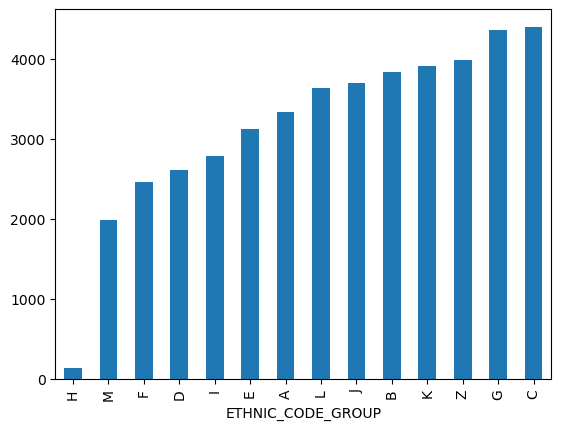

In [24]:
df_twice_agg.sort_values().plot(kind='bar')